In [1]:
#importing the required labraries
import numpy as np
import pandas as pd
import csv
import datetime
from math import sqrt
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from datetime import timedelta
#I import only the functions I need to make the excute of the code faster
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor

C:\Users\shatha\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
#Define functions to convert dates from string to numeric values.
column_names_used = [ 'Date time']
def make_numeric_values(arr, title):
    new_arr = []
    for date in arr[title]:
        new_date = make_date(date)
        new_arr.append(new_date)
    arr[title] = new_arr

def fix_array(arr):
    for name in column_names_used:
        make_numeric_values(arr, name)

def make_date(date):
    new_date = date.split(' ')
    new_date = new_date[0]
    new_date = new_date.split('-')
    new_number = ''
    first = True
    for number in new_date:
        if first:
            first = False
        else:
            new_number = new_number + number
    return new_number



In [3]:
#import the data from the csv file
dataset_url = 'sanaaWeather.csv'
data = pd.read_csv(dataset_url)
data.head()

,Location,Address,Resolved Address,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow Depth,Wind Speed,Wind Gust,Cloud Cover,Relative Humidity
0,data1,"صنعاء, اليمن","صنعاء, اليمن",2007-01-01,24.1,10.6,17.0,NaN,NaN,NaN,NaN,22.3,NaN,NaN,52.55
1,data1,"صنعاء, اليمن","صنعاء, اليمن",2007-01-02,21.1,10.1,15.7,NaN,NaN,NaN,NaN,20.5,NaN,NaN,52.15
2,data1,"صنعاء, اليمن","صنعاء, اليمن",2007-01-03,16.2,8.1,11.7,6.6,NaN,NaN,NaN,20.5,NaN,NaN,31.61
3,data1,"صنعاء, اليمن","صنعاء, اليمن",2007-01-04,20.1,7.4,12.1,7.4,NaN,NaN,NaN,25.9,NaN,NaN,30.67
4,data1,"صنعاء, اليمن","صنعاء, اليمن",2007-01-05,23.2,2.9,12.6,2.2,NaN,NaN,NaN,18.4,NaN,NaN,26.88


In [4]:
#Show breif description about the data
data.describe()

,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow Depth,Wind Speed,Wind Gust,Cloud Cover,Relative Humidity
count,364.000000,364.000000,365.000000,101.000000,171.000000,34.000000,0.0,363.000000,0.0,0.0,364.000000
mean,26.005769,11.964011,18.937260,5.564356,27.076023,3.361765,NaN,24.696694,NaN,NaN,36.516071
std,2.996793,4.628936,3.683388,2.236899,0.739522,4.436421,NaN,6.878085,NaN,NaN,12.932403
min,9.100000,0.900000,9.100000,0.600000,25.800000,0.300000,NaN,7.600000,NaN,NaN,14.020000
25%,24.100000,8.100000,15.900000,4.000000,26.600000,0.575000,NaN,20.500000,NaN,NaN,26.155000
50%,26.200000,12.700000,19.600000,5.700000,26.900000,2.000000,NaN,24.100000,NaN,NaN,34.425000
75%,28.100000,16.100000,22.100000,7.400000,27.500000,3.950000,NaN,27.700000,NaN,NaN,45.992500
max,32.100000,22.100000,25.000000,9.500000,29.800000,21.100000,NaN,92.500000,NaN,NaN,74.170000


In [5]:
#Drop(Delete) the unwanted data
data = data.drop('Address', axis=1)
data = data.drop('Location', axis=1)
data = data.drop('Maximum Temperature', axis=1)
data = data.drop('Minimum Temperature', axis=1)
data = data.drop('Resolved Address', axis=1)
data = data.drop('Wind Chill', axis=1)
data = data.drop('Heat Index', axis=1)
data = data.drop('Precipitation', axis=1)
data = data.drop('Snow Depth', axis=1)
data = data.drop('Wind Speed', axis=1)
data = data.drop('Wind Gust', axis=1)
data = data.drop('Cloud Cover', axis=1)
data = data.drop('Relative Humidity', axis=1)


In [6]:
#show the date time
time= data.drop('Temperature', axis=1)
time.head()

,Date time
0,2007-01-01
1,2007-01-02
2,2007-01-03
3,2007-01-04
4,2007-01-05


In [7]:
#Convert date to numerical values
fix_array(time)
time.head(5)

,Date time
0,0101
1,0102
2,0103
3,0104
4,0105


In [8]:
#Show the temperature values
temp = data['Temperature']
temp.head()

0    17.0
1    15.7
2    11.7
3    12.1
4    12.6
Name: Temperature, dtype: float64

In [9]:
#Train the model 
X_train, X_test, y_train, y_test = train_test_split(time, temp, test_size=0.25, random_state=42)

tree_model = DecisionTreeRegressor()

In [10]:
#show the size of the train sample
print(X_train.shape)
print(y_train.shape)
tree_model.fit(X_train, y_train)


(273, 1)
(273,)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [11]:
#store the model in pkl file
joblib.dump(tree_model, 'weather_predictor.pkl')
print("-" * 48)
print("\nDone training\n")
print("-" * 48)
tree_model = joblib.load('weather_predictor.pkl')

------------------------------------------------

Done training

------------------------------------------------


In [12]:
#Enter the date and the year you want to pretent the weather for
print("-" * 48)
print("Enter the details of the date you would like to predict")
print("\n")
option = input("Year: ")
year = option
option = input("Month number (00): ")
month = option
option = input("Day number (00): ")
theday = option
day = str(month) + str(theday)
date = [[day]]
print(date)
temp_pred = tree_model.predict(date)[0]
print("-" * 48)
print("\nThe temperature is estimated to be: " + str(temp_pred) + "\n")
print("-" * 48)


------------------------------------------------
Enter the details of the date you would like to predict


Year: 2021
Month number (00): 1
Day number (00): 1
[['11']]
------------------------------------------------

The temperature is estimated to be: 15.7

------------------------------------------------


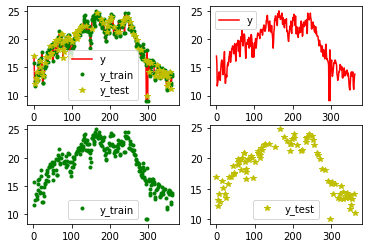

In [13]:
# plot predictions and expected results
pyplot.axis([0, 370, 0, 30])
pyplot.subplot(2, 2, 1)
pyplot.plot(temp,'r')
pyplot.plot(y_train,'.g',label="y_test")
pyplot.plot(y_test,'*y',label="y_test")
pyplot.legend(['y','y_train','y_test'])

pyplot.subplot(2, 2, 2)
pyplot.plot(temp,'r')
pyplot.legend(['y'])

pyplot.subplot(2, 2, 3)
pyplot.plot(y_train,'.g')
pyplot.legend(['y_train'])

pyplot.subplot(2, 2, 4)
pyplot.plot(y_test,'*y')
pyplot.legend(['y_test'])

pyplot.show()

In [14]:
#try to train the model with another algorithem to see the accuracy of the model
scoring = 'accuracy'
test_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(time,temp, test_size=test_size,random_state=seed)

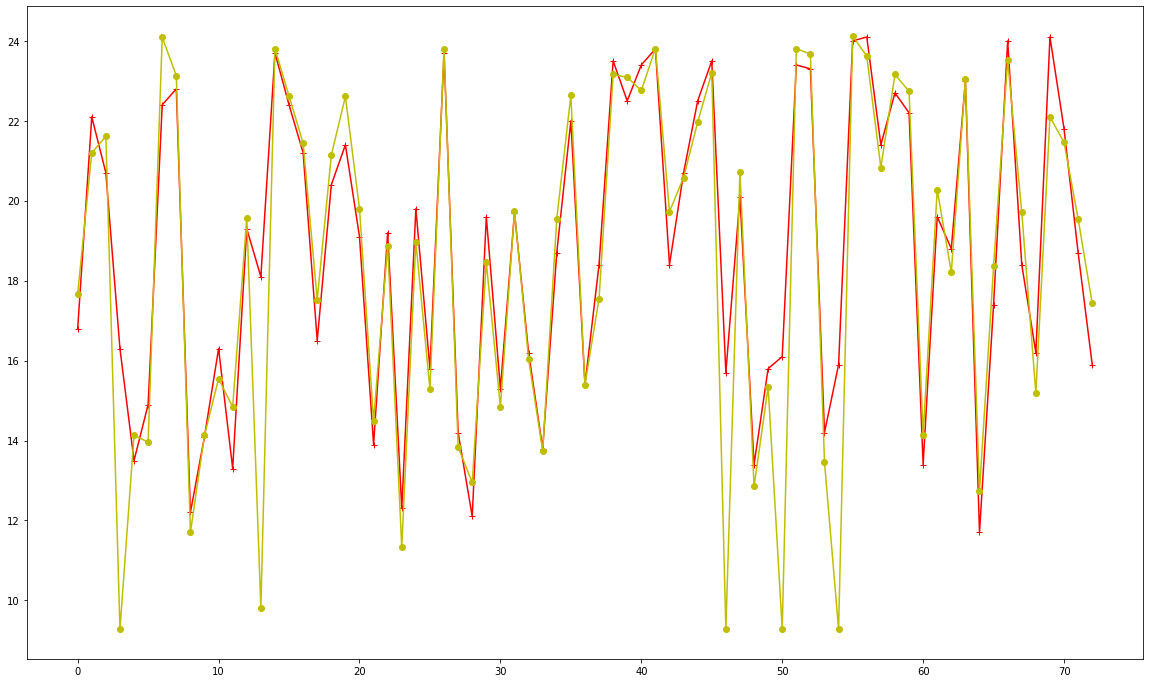

In [15]:
#Draw the real and the predicated values
model = RandomForestRegressor(n_estimators=10)
model.fit(X_train,Y_train)
predictions = model.predict(X_test)
plt.figure(figsize=(20,12))
plt.plot(range(0, Y_test.shape[0]), Y_test, marker='+',color ='r')
plt.plot(range(0, predictions.shape[0]), predictions, marker='o',color ='y')

In [16]:
#accuracy of the train samples
model.score(X_train, Y_train)

0.9890737150361092

In [17]:
#accuracy of the test samples
model.score(X_test, Y_test)

0.7134905278721768

In [18]:
# Calculate the error and the Mean Absolute Error of DecisionTreeRegressor method
errors = abs(temp_pred - Y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = 100 * (errors / Y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 4.0 degrees.
Accuracy: 80.18 %.


In [19]:
# Calculate the error and the Mean Absolute Error RandomForestRegressor method
errors = abs(predictions - Y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = 100 * (errors / Y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 1.07 degrees.
Accuracy: 93.74 %.
